<a href="https://colab.research.google.com/github/ssk2001/AI-Tech-Lab-Experiments/blob/main/2_Input_XOR_with_Sigmoidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# EX-OR Dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])

# Set random seed for reproducibility
np.random.seed(42)

# Initialize weights for input to hidden layer (2x2) and hidden to output layer (2x1)
input_layer_neurons = inputs.shape[1]   # Number of input neurons (2 for EX-OR)
hidden_layer_neurons = 2                # Number of neurons in hidden layer
output_neurons = 1                      # Output layer neuron (1 for binary classification)

# Randomly initialize weights
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))

# Learning rate
learning_rate = 0.5

# Number of iterations for training
epochs = 10000

# Training process
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    final_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(final_input)

    # Compute Error (Binary Cross Entropy Loss)
    error = outputs - predicted_output

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating weights
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += inputs.T.dot(d_hidden_layer) * learning_rate

    # Print error every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Error: {np.mean(np.abs(error))}')

# Testing the network
print("\nFinal weights after training:")
print("Weights between Input and Hidden Layer: \n", weights_input_hidden)
print("Weights between Hidden and Output Layer: \n", weights_hidden_output)

# Test the trained network
print("\nPredicted Output after training:")
print(predicted_output)


Epoch 0, Error: 0.4994268057883715
Epoch 1000, Error: 0.39538111467374626
Epoch 2000, Error: 0.26889654895576054
Epoch 3000, Error: 0.20873089977600923
Epoch 4000, Error: 0.17385873286942333
Epoch 5000, Error: 0.15093418034603046
Epoch 6000, Error: 0.13458774510706198
Epoch 7000, Error: 0.12226129887837994
Epoch 8000, Error: 0.11258132779048724
Epoch 9000, Error: 0.10474292085205908

Final weights after training:
Weights between Input and Hidden Layer: 
 [[0.90571962 7.32475086]
 [0.90572643 7.32731531]]
Weights between Hidden and Output Layer: 
 [[-27.46354604]
 [ 21.74964594]]

Predicted Output after training:
[[0.05432736]
 [0.89823995]
 [0.89824011]
 [0.13514441]]


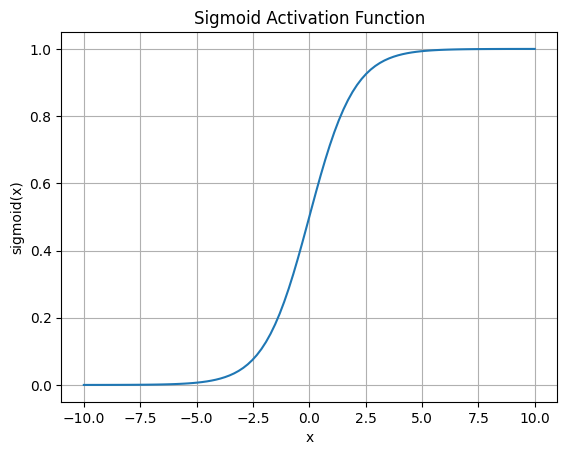

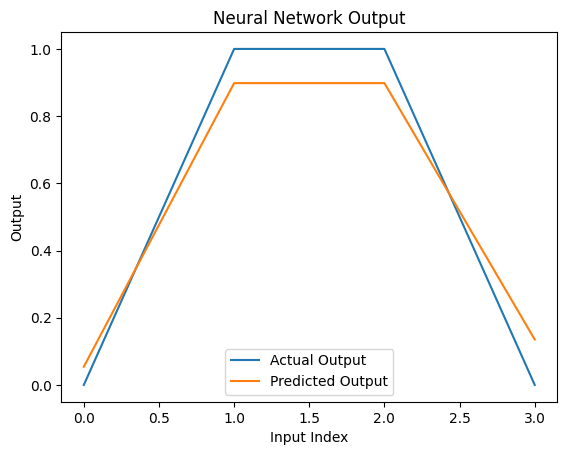

In [ ]:
# prompt: Can you now generate a sigmoidal curve and other plots for output visualization

import matplotlib.pyplot as plt
import numpy as np

# Generate data for the sigmoid curve
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# Plot the sigmoid curve
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Activation Function')
plt.grid(True)
plt.show()

# Plot the output of the neural network
plt.plot(outputs, label='Actual Output')
plt.plot(predicted_output, label='Predicted Output')
plt.xlabel('Input Index')
plt.ylabel('Output')
plt.title('Neural Network Output')
plt.legend()
plt.show()

# Plot the error over epochs (if you have stored the error values during training)
# Assuming you have a list called 'errors' storing the error values at each epoch
# plt.plot(errors)
# plt.xlabel('Epoch')
# plt.ylabel('Error')
# plt.title('Error over Epochs')
# plt.show()
